In [1]:
%autosave 30

# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Ensure plots are displayed inline
%matplotlib inline


# Read in some data to show some real world exampled
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")


# Summarize the data by customer and get the top 10 customers. Also, clean up the column names for consistency
top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)




Autosaving every 30 seconds


In [2]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 '_classic_test']

In [14]:
# choose a style

plt.style.use('ggplot')

In [3]:
#To clean up the currency in Total Revenue, we define a custom formatting function

def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

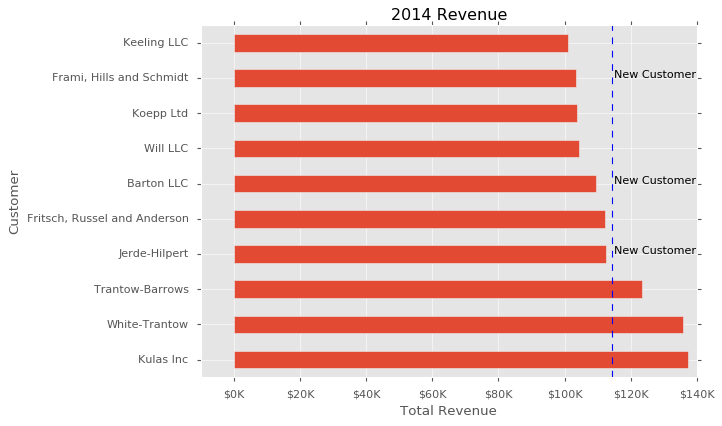

In [15]:
# Create the figure and the axes
fig, ax = plt.subplots()

# Plot the data and get the averaged
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = top_10['Sales'].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Annotate the new customers
for cust in [3, 5, 8]:
    ax.text(115000, cust, "New Customer")
    
# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False);

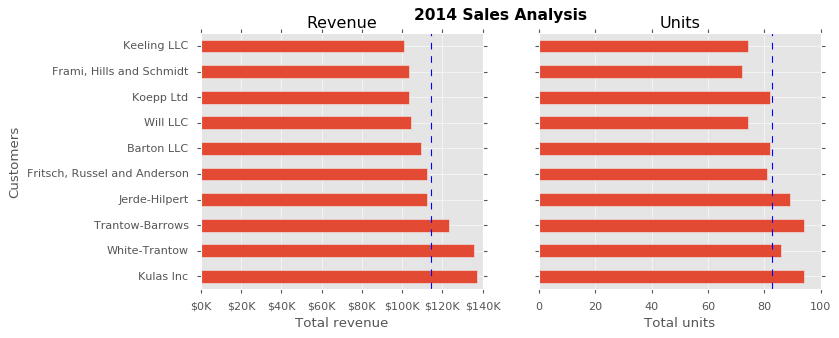

In [16]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,4))

# Build the first plot
top_10.plot(kind='barh', x='Name', y='Sales', ax=ax0)
ax0.set(title='Revenue', xlabel='Total revenue', ylabel='Customers')
formatter = FuncFormatter(currency)
ax0.xaxis.set_major_formatter(formatter)

# Add average line to the first plot
revenue_average = top_10['Sales'].mean()
ax0.axvline(x=revenue_average, color='b', label='Average', linestyle='--', linewidth=1)

# Build the second plot
top_10.plot(kind='barh', x='Name', y='Purchases', ax=ax1)
ax1.set(title='Units', xlabel='Total units', ylabel='')

# Add average line to the second plot
purchases_average = top_10['Purchases'].mean()
ax1.axvline(x=purchases_average, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold')

# Hide the plot legends
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

In [17]:
# Let's look at how to save the files
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

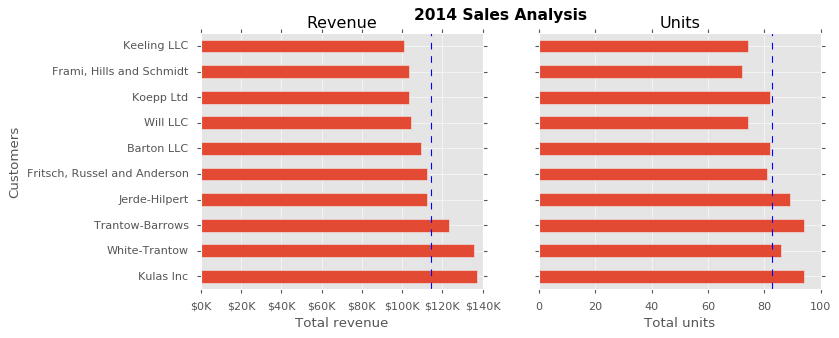

In [18]:
# save the image

fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

# import an image viewer
from IPython.display import Image

# view the image
Image('sales.png')